In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from io import BytesIO
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [ ]:
url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
np.array(img)

In [ ]:
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
digits.data.shape

images = digits.data.values.reshape(-1, 28, 28)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

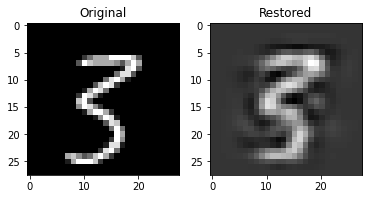

In [12]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

### Задача 1
Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство (заполните ??? так, чтобы результат совпал с результатом в предыдущей ячейке)

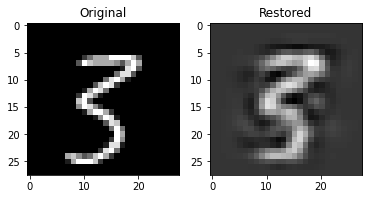

In [13]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

### Задача 2
Определите, сколько нужно взять главных компонент, чтобы объяснить 99%, 95%, 90%, и 85% исходной дисперсии.

In [14]:
pca = PCA()
X_transformed = pca.fit_transform(digits.data.astype(float)) 

In [15]:
full_var = pca.explained_variance_ratio_.cumsum().round(2) * 100

In [16]:
perc_full = int(round(np.mean(np.where(full_var == 100))))
print('Для 100%: ', perc_full )

Для 100%:  584


In [17]:
perc_99 = int(round(np.mean(np.where(full_var == 99))))
print('Для 99%: ', perc_99)

Для 99%:  338


In [18]:
perc_95 = int(round(np.mean(np.where(full_var == 95))))
print('Для 95%: ', perc_95)

Для 95%:  153


In [19]:
perc_90 = int(round(np.mean(np.where(full_var == 90))))
print('Для 90%: ', perc_90)

Для 90%:  86


In [20]:
perc_85 = int(round(np.mean(np.where(full_var == 85))))
print('Для 85%: ', perc_90)

Для 85%:  86


### Задача 3
Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.



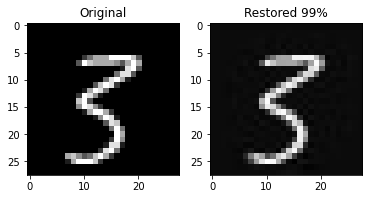

In [22]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)

pca_99 = PCA(perc_99)
trans_99 = pca_99.fit_transform(digits.data.astype(float))
restored_99 = pca_99.inverse_transform(trans_99)

ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(restored_99[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 99%')
plt.show()

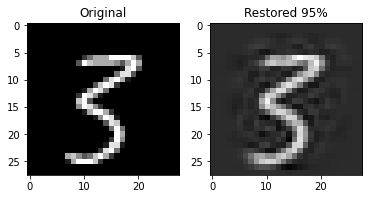

In [23]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)

pca_95 = PCA(perc_95)
trans_95 = pca_95.fit_transform(digits.data.astype(float))
restored_95 = pca_95.inverse_transform(trans_95)

ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(restored_95[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 95%')
plt.show()

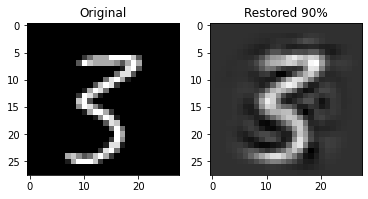

In [24]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)

pca_90 = PCA(perc_90)
trans_90 = pca_90.fit_transform(digits.data.astype(float))
restored_90 = pca_90.inverse_transform(trans_90)

ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(restored_90[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 90%')
plt.show()

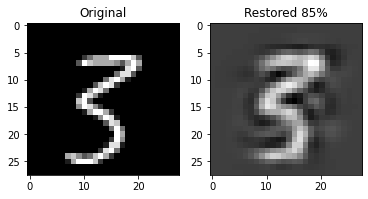

In [25]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)

pca_85 = PCA(perc_85)
trans_85 = pca_85.fit_transform(digits.data.astype(float))
restored_85 = pca_85.inverse_transform(trans_85)

ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(restored_85[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 85%')
plt.show()